Before we build an **anomaly detection autoencoder** for school dropout predictions we need to see what data we have. We will be using use a portugese dataset from 2021. 

This dataset provides a comprehensive view of students enrolled in various undergraduate degrees offered at a higher education institution. It includes demographic data, social-economic factors and academic performance information that can be used to analyze the possible predictors of student dropout and academic success. 

Source: [UC Irvine ML Repository](https://doi.org/10.24432/C5MC89)



In [77]:
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('data/students_dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [79]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## Data Structure

We have structured data of 4424 rows with the following columns.

##### Column #0 - Marital status
This column holds the marital status of the student.
* 1 – single
* 2 – married
* 3 – widower 
* 4 – divorced 
* 5 – de facto union
* 6 – legally separated

##### Column #1 - Application mode
The method of application used by the student.
* 1 - 1st phase - general contingent 
* 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 
* 7 - Holders of other higher courses 
* 10 - Ordinance No. 854-B/99 
* 15 - International student (bachelor) 
* 16 - 1st phase - special contingent (Madeira Island) 
* 17 - 2nd phase - general contingent 
* 18 - 3rd phase - general contingent 
* 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 
* 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 
* 39 - Over 23 years old 
* 42 - Transfer 
* 43 - Change of course 
* 44 - Technological specialization diploma holders 
* 51 - Change of institution/course 
* 53 - Short cycle diploma holders 
* 57 - Change of institution/course (International)

##### Column #2 - Application order
The order in which the student applied (between 0 - first choice; and 9 last choice).

##### Column #3 - Course
The course taken by the student. 
* 33 - Biofuel Production Technologies
* 171 - Animation and Multimedia Design 
* 8014 - Social Service (evening attendance) 
* 9003 - Agronomy 
* 9070 - Communication Design 
* 9085 - Veterinary Nursing 
* 9119 - Informatics Engineering 
* 9130 - Equinculture 
* 9147 - Management 
* 9238 - Social Service 
* 9254 - Tourism 
* 9500 - Nursing 
* 9556 - Oral Hygiene 
* 9670 - Advertising and Marketing Management 
* 9773 - Journalism and Communication 
* 9853 - Basic Education 
* 9991 - Management (evening attendance)

##### Column 4 - Daytime/evening attendance
Whether the student attends classes during the day or in the evening.
* 1 – daytime 
* 0 - evening

##### Column 5 - Previous qualification
The qualification obtained by the student before enrolling in higher education.

* 1 - Secondary education
* 2 - Higher education - bachelor's degree
* 3 - Higher education - degree
* 4 - Higher education - master's
* 5 - Higher education - doctorate
* 6 - Frequency of higher education
* 9 - 12th year of schooling - not completed
* 10 - 11th year of schooling - not completed
* 12 - Other - 11th year of schooling
* 14 - 10th year of schooling
* 15 - 10th year of schooling - not completed
* 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv.
* 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv.
* 39 - Technological specialization course
* 40 - Higher education - degree (1st cycle)
* 42 - Professional higher technical course
* 43 - Higher education - master (2nd cycle)

##### Column 6 - Previous qualification (grade)
Grade of previous qualification (between 0 and 200)

##### Column 7 - Nacionality
The nationality of the student.

* 1 - Portuguese;
* 2 - German;
* 6 - Spanish;
* 11 - Italian;
* 13 - Dutch;
* 14 - English;
* 17 - Lithuanian;
* 21 - Angolan;
* 22 - Cape Verdean;
* 24 - Guinean;
* 25 - Mozambican;
* 26 - Santomean;
* 32 - Turkish;
* 41 - Brazilian;
* 62 - Romanian;
* 100 - Moldova (Republic of);
* 101 - Mexican;
* 103 - Ukrainian;
* 105 - Russian;
* 108 - Cuban;
* 109 - Colombian

##### Column 8 - Mother's qualification
The qualification of the student's mother.

* 1 - Secondary Education - 12th Year of Schooling or Eq.
* 2 - Higher Education - Bachelor's Degree
* 3 - Higher Education - Degree
* 4 - Higher Education - Master's
* 5 - Higher Education - Doctorate
* 6 - Frequency of Higher Education
* 9 - 12th Year of Schooling - Not Completed
* 10 - 11th Year of Schooling - Not Completed
* 11 - 7th Year (Old)
* 12 - Other - 11th Year of Schooling
* 14 - 10th Year of Schooling
* 18 - General commerce course
* 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
* 22 - Technical-professional course
* 26 - 7th year of schooling
* 27 - 2nd cycle of the general high school course
* 29 - 9th Year of Schooling - Not Completed
* 30 - 8th year of schooling
* 34 - Unknown
* 35 - Can't read or write
* 36 - Can read without having a 4th year of schooling
* 37 - Basic education 1st cycle (4th/5th year) or equiv.
* 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
* 39 - Technological specialization course
* 40 - Higher education - degree (1st cycle)
* 41 - Specialized higher studies course
* 42 - Professional higher technical course
* 43 - Higher Education - Master (2nd cycle)
* 44 - Higher Education - Doctorate (3rd cycle)

##### Column 9 - Father's qualification
The qualification of the student's father. Same categories as above.

##### Column 10 - Mother's occupation
The occupation of the student's mother.
 

* 0 - Student
* 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
* 2 - Specialists in Intellectual and Scientific Activities
* 3 - Intermediate Level Technicians and Professions
* 4 - Administrative staff
* 5 - Personal Services, Security and Safety Workers and Sellers
* 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
* 7 - Skilled Workers in Industry, Construction and Craftsmen
* 8 - Installation and Machine Operators and Assembly Workers
* 9 - Unskilled Workers 10 - Armed Forces Professions
* 10 - Armed Forces Professions 
* 90 - Other Situation
* 99 - (blank) Unknown
* 101 - Armed Forces Officers
* 102 - Armed Forces Sergeants
* 103 - Other Armed Forces personnel
* 112 - Directors of administrative and commercial services
* 114 - Hotel, catering, trade and other services directors
* 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 
* 122 - Health professionals
* 123 - Teachers
* 124 - Specialists in finance, accounting, administrative organization, public and commercial relations
* 125 - Specialists in information and communication technologies (ICT)
* 131 - Intermediate level science and engineering technicians and professions
* 132 - Technicians and professionals, of intermediate level of health
* 134 - Intermediate level technicians from legal, social, sports, cultural and similar services
* 135 - Information and communication technology technicians
* 141 - Office workers, secretaries in general and data processing operators
* 143 - Data, accounting, statistical, financial services and registry-related operators
* 144 - Other administrative support staff
* 151 - Personal service workers
* 152 - Sellers
* 153 - Personal care workers and the like
* 154 - Protection and security services personnel
* 161 - Market-oriented farmers and skilled agricultural and animal production workers
* 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence
* 171 - Skilled construction workers and the like, except electricians
* 172 - Skilled workers in metallurgy, metalworking and similar 
* 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like
* 174 - Skilled workers in electricity and electronics
* 175 - Workers in food processing, woodworking, clothing and other industries and crafts
* 181 - Fixed plant and machine operators 
* 182 - Assembly workers 
* 183 - Vehicle drivers and mobile equipment operators
* 191 - Cleaning workers
* 192 - Unskilled workers in agriculture, animal production, fisheries and forestry
* 193 - Unskilled workers in extractive industry, construction, manufacturing and transport
* 194 - Meal preparation assistants
* 195 - Street vendors (except food) and street service providers

##### Column 11 - Father's occupation
The occupation of the student's father. Same categories as above.

##### Column 12 - Admission grade
Admission grade (between 0 and 200)		

##### Column 13 - Displaced
Whether the student is a displaced person. 
* 1 – yes 
* 0 – no


##### Column 14 - Educational special needs
Whether the student has any special educational needs.
* 1 – yes 
* 0 – no

##### Column 15 - Debtor
Whether the student is a debtor.
* 1 – yes 
* 0 – no

##### Column 16 - Tuition fees up to date
Whether the student's tuition fees are up to date.
* 1 – yes 
* 0 – no

##### Column 17 - Gender
The gender of the student.
* 1 – male
* 0 – female

##### Column 18 - Scholarship holder
Whether the student is a scholarship holder.
* 1 – yes 
* 0 – no

##### Column 19 - Age at enrollment
The age of the student at the time of enrollment.

##### Column 20 - International
Whether the student is an international student.
* 1 – yes 
* 0 – no

##### Column 21 - Curricular units 1st sem (credited)
The number of curricular units credited by the student in the first semester.

##### Column 22 - Curricular units 1st sem (enrolled)
The number of curricular units enrolled by the student in the first semester.

##### Column 23 - Curricular units 1st sem (evaluations)
The number of curricular units evaluated by the student in the first semester.

##### Column 24 - Curricular units 1st sem (approved)
The number of curricular units approved by the student in the first semester. 

##### Column 25 - Curricular units 1st sem (approved)
The number of curricular units approved by the student in the first semester. 

##### Column 26 - Curricular units 1st sem (grade)
Grade average in the 1st semester (between 0 and 20).

##### Column 27 - Curricular units 1st sem (without evaluations)
Number of curricular units without evalutions in the 1st semester.

##### Column 28 - Curricular units 2nd sem (credited)
Number of curricular units credited in the 2nd semester.

##### Column 29 - Curricular units 2nd sem (enrolled)
Number of curricular units enrolled in the 2nd semester.

##### Column 30 - Curricular units 2nd sem (evaluations)
Number of evaluations to curricular units in the 2nd semester.

##### Column 31 - Curricular units 2nd sem (approved)
Number of curricular units approved in the 2nd semester.

##### Column 32 - Curricular units 2nd sem (grade)
Grade average in the 2nd semester (between 0 and 20).

##### Column 33 - Curricular units 2nd sem (without evaluations)
Number of curricular units without evalutions in the 1st semester.

##### Column 34 - Unemployment rate
Unemployment rate (%).

##### Column 35 - Inflation rate
Inflation rate (%)

##### Column 36 - GDP

##### Column 37 - Target
The status of the student at the end of the course.
* Dropout
* Graduate
* Enrolled (at the end of the course haven't graduated yet, but haven't dropped either)

Now, let's explore the data a little bit more.

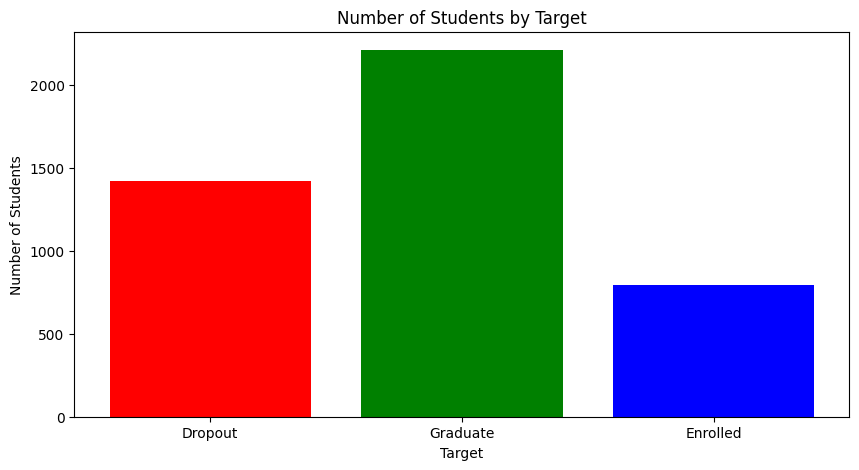

In [80]:
# Calculate the number of dropouts, graduates and enrolled students in percentage and plot the results
dropouts = df[df['Target'] == 'Dropout']
graduates = df[df['Target'] == 'Graduate']
enrolled = df[df['Target'] == 'Enrolled']

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(['Dropout', 'Graduate', 'Enrolled'], [len(dropouts), len(graduates), len(enrolled)], color=['red', 'green', 'blue'])
plt.xlabel('Target')
plt.ylabel('Number of Students')
plt.title('Number of Students by Target')
plt.show()

The dropout percentage is quite high. 

#### Is gender and drop out rate correlated?

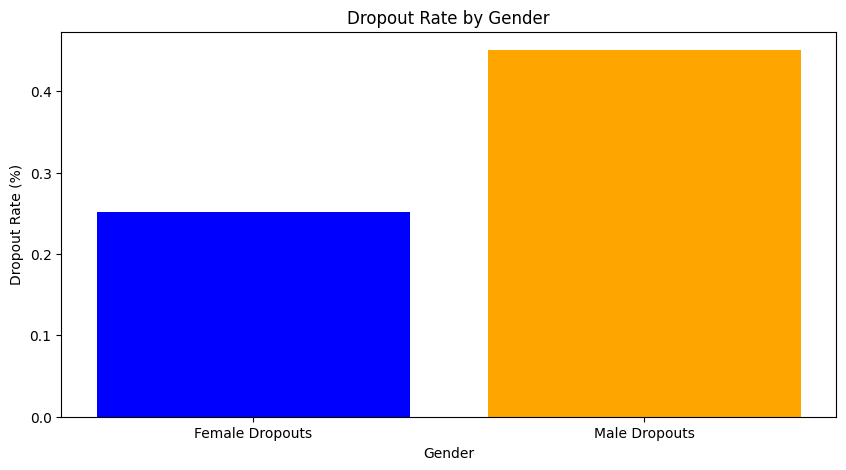

In [81]:
# Check if gender and drop out rate are correlated
# Calculate the drop out rate for each gender
dropout_rate_by_gender = df.groupby('Gender')['Target'].value_counts(normalize=True)

plt.figure(figsize=(10, 5))
plt.bar(['Female Dropouts', 'Male Dropouts'], [dropout_rate_by_gender[0]['Dropout'], dropout_rate_by_gender[1]['Dropout']], color=['blue', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Dropout Rate (%)')
plt.title('Dropout Rate by Gender')
plt.show()

#### Are the older students at a higher risk of dropping out?

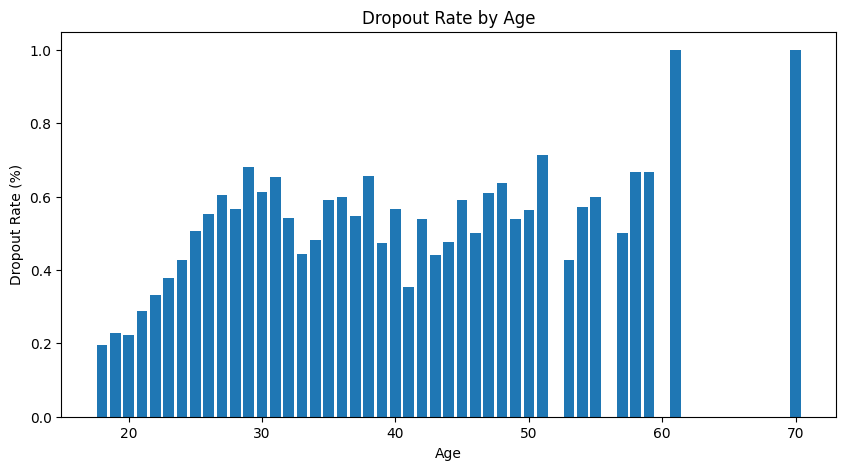

In [82]:
# Check if age and drop out rate are correlated
dropout_rate_by_age = df.groupby('Age at enrollment')['Target'].value_counts(normalize=True)

age_list = []
dropouts_percentage = []
for (age, target_name), dropout_rate in dropout_rate_by_age.items():
    if target_name == 'Dropout':
        age_list.append(age)
        dropouts_percentage.append(dropout_rate)

plt.figure(figsize=(10, 5))
plt.bar(age_list, dropouts_percentage)
plt.xlabel('Age')
plt.ylabel('Dropout Rate (%)')
plt.title('Dropout Rate by Age')
plt.show()